In [ ]:
# Bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
# Leitura dos dados

demandareal = pd.read_excel("setembro2021.xlsx")
demandareal = demandareal["CONSUMO"].values
teste = np.reshape(demandareal,(30,24))


In [ ]:
# Função objetivo a ser minimizada, com penalidade de demanda

def fitness(individuo,demanda,volume_maximo,volume_minimo,custo,vazao,check = 0):

    volume = volume_maximo

    fit = np.sum(custo[individuo])
    volume_t = individuo*vazao - demanda
    volume_t = np.array([volume] + list(volume_t))
    volume_t = np.cumsum(volume_t)
    volume_penal = volume_t[(volume_t <volume_minimo)| (volume_t  >volume_maximo)]

    if(check == 1):
        print(volume_penal,fit,len(volume_penal))

    fit += fit*(np.sum(np.abs(volume_penal-volume)))
    return fit

In [ ]:
# Definição da tarifa:

def S(t):
    hora = t % 24  # Calcula a hora do dia a partir do índice t
    if hora >= 17 and hora < 21:  # Horário de ponta
        return 1.63527
    else:  # Horário fora de ponta
        return 0.62124
        
tarifa = np.array([S(i) for i in range(len(demandareal))])

In [ ]:
# Seleção
def selecao(populacao, aptidao):
    aid = np.random.choice(len(populacao), size=2, replace=False)
    bid = np.random.choice(len(populacao), size=2, replace=False)
    
    aid = aid[np.argmax(aptidao[aid])]
    bid = bid[np.argmax(aptidao[bid])]
    a = populacao[aid]
    b = populacao[bid]
    apt = aptidao[aid]
    bpt = aptidao[bid]
    
    return np.array([a, b]), np.array([apt, bpt])

In [ ]:
# Cruzamento

def cruzamento(pais,aptidao,procruz):
    if(np.random.rand()<procruz):
        p = 1 - aptidao/(np.sum(aptidao))
        filho = np.array([pais[0][i] if(np.random.rand() < p[0]) else pais[1][i] for i in range(pais.shape[1])])
    else:
        filho = pais[np.argmin(aptidao),:]
    return filho 

In [ ]:
# Mutação

def mutacao(individuo, probmut):
    n = len(individuo)
    copia = np.copy(individuo)
    num_mutacoes = int(probmut * n)
    idx = np.random.choice(n, size=num_mutacoes, replace=False)

    for i in range(num_mutacoes):
        gene = idx[i]
        novo_valor = np.random.uniform(0, 1)
        novo_gene = 0 if novo_valor <= 0.5 else 1
        copia[gene] = novo_gene

    return copia

In [ ]:
def AG(demandareal,tarifa,volume_maximo,volume_minimo,vazao,taxa_cruzamento,probmut,num_individuals):
    np.random.seed(424)
    num_genes = len(demandareal)
    populacao = np.random.choice([True, False], size=(num_individuals,num_genes))
    F = lambda individuo: fitness(individuo, demandareal, volume_maximo, volume_minimo, tarifa, vazao)
    aptidao = np.array([F(individuo) for individuo in populacao])
    
    historico = []
    contador = 0
    while True:
        
        pais,apt = selecao(populacao,aptidao)

        filho = cruzamento(pais,apt,taxa_cruzamento)
        filho = mutacao(filho,probmut)

        # Elitismo para garantir que o pior individuo seja substituido pelo melhor. O pior tem apt max e o melhor apt min.
        populacao[np.argmax(aptidao),:] = filho
        aptidao[np.argmax(aptidao)] = F(filho)

        historico.append([aptidao[np.argmin(aptidao)],np.mean(aptidao)])

        if(np.mean(aptidao) - aptidao[np.argmin(aptidao)] < 1e-5):
            break
        contador += 1
        if(contador%1000 == 0):
            print(aptidao[np.argmin(aptidao)])
        if(aptidao[np.argmin(aptidao)] < 6000):
            break
        
    historico = np.array(historico)
    return historico,populacao[np.argmin(aptidao)]

# quanto maior a aptidao pior pq eu quero minimizar, entao eu quero a menor aptidao, a não ser que eu use o inverso da maior e ai eu manteria a decisão de ficar com a maior aptidao

In [181]:
# Tamanho da solução binária

#num_genes = len(demandareal)

# Número de indivíduos na população inicial
volume_maximo = 5
volume_minimo = 2
vazao = 2

# Parâmetros genéticos:

procruz = 0.7
probmut = 0.01
num_individuals = 100 #tamanho da população

# Algoritmo Genético:

# Criação da população inicial

dados,melhor_valor = AG(demandareal,tarifa,volume_maximo,volume_minimo,vazao,procruz,probmut,num_individuals)


6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6229.531308000624
6080.650632000727
6080.650632000727
6080.650632000727
6080.650632000727
6080.650632000727
6080.650632000727
6080.65063

In [182]:
fitness(melhor_valor, demandareal, volume_maximo, volume_minimo, tarifa, vazao,1)


[6.29 6.26 6.24 6.21 5.57 5.28 5.22 5.21 5.21 5.21 5.21 5.21 6.1  6.07
 6.06 6.06 6.06 6.06 5.12 1.95 1.32 1.97 1.67 5.45 5.45 5.45 5.45 5.58
 6.35 6.12 5.66 5.66 5.66 5.66 5.66 5.66 5.66 5.66 5.66 7.66 6.2  1.86
 5.56 5.56 5.56 7.56 7.56 7.35 5.74 6.11 5.48 5.48 5.48 5.47 5.47 5.47
 5.46 5.46 5.46 7.46 7.46 6.92 5.31 6.22 6.22 6.21 5.85 6.23 6.99 6.99
 7.44 5.86 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02
 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02
 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.73 5.1  6.73 6.73 6.73 6.53
 2.   5.75 5.75 5.75 5.75 5.75 5.75 5.75 5.75 5.75 5.75 5.75 5.75 5.75
 5.75 5.75 5.68 1.2  5.53 5.42 5.42 5.42 5.42 5.42 5.42 6.12 5.02 5.9
 5.9  5.9  5.89 6.34 5.68 5.01 6.2  6.78 5.26] 47.87160000000001 149


5789.112588000706

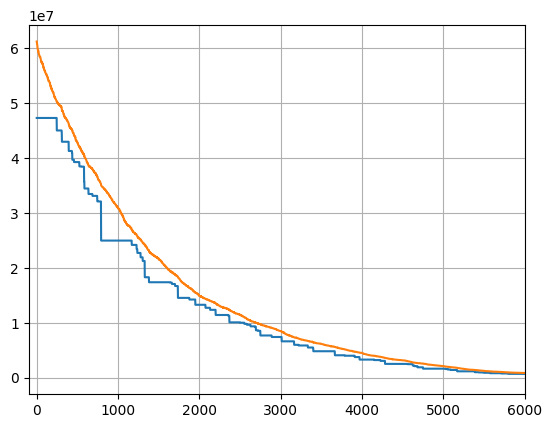

In [193]:
plt.plot(range(len(dados.T[0])),dados.T[0])
plt.plot(range(len(dados.T[0])),dados.T[1])
plt.grid()
plt.xlim(-100, 6000)

plt.show()